In [16]:
from bs4 import BeautifulSoup
import requests
import ipywidgets as widgets
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaganyesilova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
output_url = widgets.Text()
input_url = widgets.Text()

def cre_var(sender):
    output_url.value = input_url.value

input_url.on_submit(cre_var)

def inp_url():
    return input_url



In [69]:
def find_news():
    
    response = requests.get(output_url.value, timeout=10)
    url_content = BeautifulSoup(response.content, 'html.parser')
    
    return url_content

html = find_news()

In [70]:
def make_news_list(html):

    news_divs = html.find_all('div', attrs={'class':"item"})

    news_heads = []

    for i in range(len(news_divs)):
    
        news_heads.append(news_divs[i].a.get_text())
    
    
    df = pd.DataFrame(news_heads)

    df.columns = ['news']

    return df

df_news = make_news_list(html)

df_news.head()

,news
0,Borsa Istanbul says 10 companies will trade on...
1,Turkey signs deal for production of Turkish-de...
2,BRIEF-Karel Elektronik Gets New Generation Int...
3,"Erdogan says Turkey, Russia may cooperate on d..."
4,Turkey awards missile system study to Franco-I...


In [71]:
def cal_score(df_news):
    scores = []
    vader = SentimentIntensityAnalyzer()
    for head in (df_news['news']):
        score = vader.polarity_scores(head)
        scores.append(score)
    df_scr = pd.DataFrame(scores)
    return df_scr

df_scr = cal_score(df_news)

df_scr.head(5)

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.000
1,-0.3818,0.224,0.776,0.000
2,0.0000,0.000,1.000,0.000
3,0.1027,0.000,0.877,0.123
4,0.4588,0.000,0.750,0.250


In [72]:
def merg_df():
    return df_news.join(df_scr)

df = merg_df()

df.head()

,news,compound,neg,neu,pos
0,Borsa Istanbul says 10 companies will trade on...,0.0000,0.000,1.000,0.000
1,Turkey signs deal for production of Turkish-de...,-0.3818,0.224,0.776,0.000
2,BRIEF-Karel Elektronik Gets New Generation Int...,0.0000,0.000,1.000,0.000
3,"Erdogan says Turkey, Russia may cooperate on d...",0.1027,0.000,0.877,0.123
4,Turkey awards missile system study to Franco-I...,0.4588,0.000,0.750,0.250


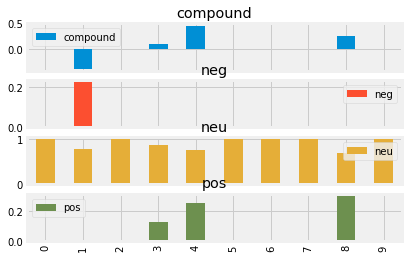

In [73]:

df.plot.bar(subplots=True)

plt.show()

In [82]:
button_url = widgets.Button(
    description = 'Input Url',
    disabled = False,
    button_style = 'info',
    tooltip = 'Click to Preview',
    icon = 'search'
)

def preview_clicked(b):
    return inp_url()

    
button_url.on_click(preview_clicked)
    
button_url

Button(button_style='info', description='Input Url', icon='search', style=ButtonStyle(), tooltip='Click to Pre…

In [81]:
tab = widgets.Tab()
placeholder = widgets.Label()

tab.children = [button_url, placeholder, placeholder]

tab.set_title(0, 'Upload')
tab.set_title(1, 'Describer')
tab.set_title(2, 'Plotter')

tab